In [2]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from sklearn.metrics import classification_report

In [3]:
(x_train, y_train) , (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


**Visualizing the Dataset**

In [4]:
import matplotlib.pyplot as plt

In [5]:
x_train.shape

(60000, 28, 28)

In [7]:
single_image = x_train[0]
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
y_train[0]

5

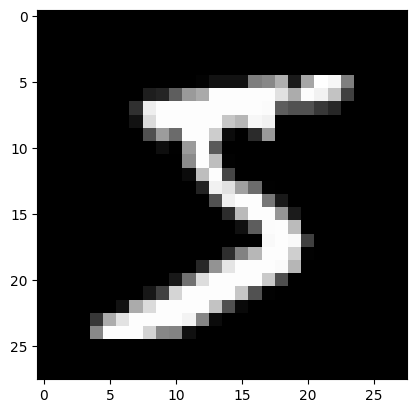

In [10]:
plt.imshow(single_image, cmap='gray')

**Pre-Processing**

In [11]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [12]:
y_train.shape

(60000,)

In [13]:
y_example = to_categorical(y_train)

In [14]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [15]:
y_example.shape

(60000, 10)

In [16]:
y_cat_train = to_categorical(y_train,10)

In [17]:
y_cat_test = to_categorical(y_test,10)

In [18]:
single_image.max()

255

In [19]:
single_image.min()

0

In [20]:
x_train = x_train/255
x_test = x_test/255

In [21]:
scaled_image = x_train[0]

In [22]:
scaled_image.max()

1.0

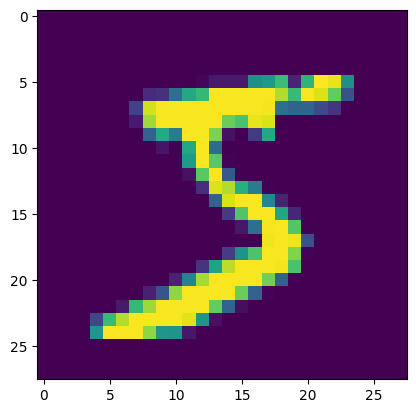

In [23]:
plt.imshow(scaled_image)

In [24]:
x_train = x_train.reshape(60000 , 28, 28, 1)

In [25]:
x_train.shape

(60000, 28, 28, 1)

In [26]:
x_test = x_test.reshape(10000 , 28, 28, 1)

In [27]:
x_test.shape

(10000, 28, 28, 1)

**Model**

In [29]:
model = Sequential()

model.add(Conv2D(filters = 32 , kernel_size = (3,3) , input_shape = (28,28,1) , activation = 'relu'))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(128 , activation = 'relu'))

model.add(Dense(10,activation = 'softmax'))

In [31]:
model.compile(loss= 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [33]:
model.fit(x_train , y_cat_train , epochs = 2)

Epoch 1/2
1875/1875 [==============================] - 39s 20ms/step - loss: 0.1536 - accuracy: 0.9540
Epoch 2/2
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0532 - accuracy: 0.9838


In [34]:
model.metrics_names

['loss', 'accuracy']

In [35]:
model.evaluate(x_test , y_cat_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0466 - accuracy: 0.9848


[0.04662245512008667, 0.9847999811172485]

In [36]:
import numpy as np

In [37]:
predictions = model.predict(x_test)
prediction_classes = np.argmax(predictions , axis=1)

313/313 [==============================] - 2s 6ms/step


In [38]:
report = classification_report(y_test , prediction_classes)

In [39]:
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.96      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

